In [25]:
import pandas as pd

covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.head())

date province/state country  confirmed  deaths  recovered
0  01/22/2020          Anhui   China        1.0     0.0        0.0
1  01/22/2020        Beijing   China       14.0     0.0        0.0
2  01/22/2020      Chongqing   China        6.0     0.0        0.0
3  01/22/2020         Fujian   China        1.0     0.0        0.0
4  01/22/2020          Gansu   China        0.0     0.0        0.0

In [26]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')

vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]

vaccinations_data.head(3)

country        date  total_vaccinations  people_vaccinated  \
0  Afghanistan  2021-02-22                 0.0                0.0   
1  Afghanistan  2021-02-23                 NaN                NaN   
2  Afghanistan  2021-02-24                 NaN                NaN   

   people_vaccinated_per_hundred  people_fully_vaccinated  \
0                            0.0                      NaN   
1                            NaN                      NaN   
2                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations  \
0                                  NaN                 NaN   
1                                  NaN              1367.0   
2                                  NaN              1367.0   

                                            vaccines  
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...

## Предобработка

In [27]:
# Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. Тем самым переходим от данных по регионам к данным по странам:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()



covid_data

date             country  confirmed  deaths  recovered
0      01/01/2021         Afghanistan    51526.0  2191.0    41727.0
1      01/01/2021             Albania    58316.0  1181.0    33634.0
2      01/01/2021             Algeria    99897.0  2762.0    67395.0
3      01/01/2021             Andorra     8117.0    84.0     7463.0
4      01/01/2021              Angola    17568.0   405.0    11146.0
...           ...                 ...        ...     ...        ...
86780  12/31/2020             Vietnam     1465.0    35.0     1325.0
86781  12/31/2020  West Bank and Gaza   138004.0  1400.0   117183.0
86782  12/31/2020               Yemen     2099.0   610.0     1394.0
86783  12/31/2020              Zambia    20725.0   388.0    18660.0
86784  12/31/2020            Zimbabwe    13867.0   363.0    11250.0

[86785 rows x 5 columns]

In [28]:
# Преобразуем даты в формат datetime с помощью функции pd.to_datetime():

covid_data['date'] = pd.to_datetime(covid_data['date'])

In [29]:
# Создадим признак больных на данный момент (active).
# Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:

covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

In [30]:
covid_data

date             country  confirmed  deaths  recovered   active
0     2021-01-01         Afghanistan    51526.0  2191.0    41727.0   7608.0
1     2021-01-01             Albania    58316.0  1181.0    33634.0  23501.0
2     2021-01-01             Algeria    99897.0  2762.0    67395.0  29740.0
3     2021-01-01             Andorra     8117.0    84.0     7463.0    570.0
4     2021-01-01              Angola    17568.0   405.0    11146.0   6017.0
...          ...                 ...        ...     ...        ...      ...
86780 2020-12-31             Vietnam     1465.0    35.0     1325.0    105.0
86781 2020-12-31  West Bank and Gaza   138004.0  1400.0   117183.0  19421.0
86782 2020-12-31               Yemen     2099.0   610.0     1394.0     95.0
86783 2020-12-31              Zambia    20725.0   388.0    18660.0   1677.0
86784 2020-12-31            Zimbabwe    13867.0   363.0    11250.0   2254.0

[86785 rows x 6 columns]

In [31]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data

date                         country  confirmed  deaths  \
11337 2020-02-24                     Afghanistan        1.0     0.0   
11570 2020-02-25                     Afghanistan        1.0     0.0   
11807 2020-02-26                     Afghanistan        1.0     0.0   
12051 2020-02-27                     Afghanistan        1.0     0.0   
12299 2020-02-28                     Afghanistan        1.0     0.0   
...          ...                             ...        ...     ...   
15933 2020-03-12  occupied Palestinian territory        0.0     0.0   
16595 2020-03-14  occupied Palestinian territory        0.0     0.0   
16938 2020-03-15  occupied Palestinian territory        0.0     0.0   
17290 2020-03-16  occupied Palestinian territory        0.0     0.0   
17645 2020-03-17  occupied Palestinian territory        0.0     0.0   

       recovered  active  
11337        0.0     1.0  
11570        0.0     1.0  
11807        0.0     1.0  
12051        0.0     1.0  
12299        0.0     1.0  
...          ...     ...  
15933        0.0     0.0  
16595        0.0     0.0  
16938        0.0     0.0  
17290        0.0     0.0  
17645        0.0     0.0  

[86785 rows x 6 columns]

In [32]:
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

covid_data

date                         country  confirmed  deaths  \
11337 2020-02-24                     Afghanistan        1.0     0.0   
11570 2020-02-25                     Afghanistan        1.0     0.0   
11807 2020-02-26                     Afghanistan        1.0     0.0   
12051 2020-02-27                     Afghanistan        1.0     0.0   
12299 2020-02-28                     Afghanistan        1.0     0.0   
...          ...                             ...        ...     ...   
15933 2020-03-12  occupied Palestinian territory        0.0     0.0   
16595 2020-03-14  occupied Palestinian territory        0.0     0.0   
16938 2020-03-15  occupied Palestinian territory        0.0     0.0   
17290 2020-03-16  occupied Palestinian territory        0.0     0.0   
17645 2020-03-17  occupied Palestinian territory        0.0     0.0   

       recovered  active  daily_confirmed  daily_deaths  daily_recovered  
11337        0.0     1.0              NaN           NaN              NaN  
11570        0.0     1.0              0.0           0.0              0.0  
11807        0.0     1.0              0.0           0.0              0.0  
12051        0.0     1.0              0.0           0.0              0.0  
12299        0.0     1.0              0.0           0.0              0.0  
...          ...     ...              ...           ...              ...  
15933        0.0     0.0              0.0           0.0              0.0  
16595        0.0     0.0              0.0           0.0              0.0  
16938        0.0     0.0              0.0           0.0              0.0  
17290        0.0     0.0              0.0           0.0              0.0  
17645        0.0     0.0              0.0           0.0              0.0  

[86785 rows x 9 columns]

In [33]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [34]:
covid_data['date'].max()

Timestamp('2021-05-29 00:00:00')

In [35]:
vaccinations_data['date'].max()

Timestamp('2021-09-06 00:00:00')

## Объединение

In [36]:
covid_df = covid_data.merge(
    vaccinations_data,    
    how='left',
    left_on=['date','country'],
    right_on=['date','country']
)

covid_df.head(3)

date      country  confirmed  deaths  recovered  active  \
0 2020-02-24  Afghanistan        1.0     0.0        0.0     1.0   
1 2020-02-25  Afghanistan        1.0     0.0        0.0     1.0   
2 2020-02-26  Afghanistan        1.0     0.0        0.0     1.0   

   daily_confirmed  daily_deaths  daily_recovered  total_vaccinations  \
0              NaN           NaN              NaN                 NaN   
1              0.0           0.0              0.0                 NaN   
2              0.0           0.0              0.0                 NaN   

   people_vaccinated  people_vaccinated_per_hundred  people_fully_vaccinated  \
0                NaN                            NaN                      NaN   
1                NaN                            NaN                      NaN   
2                NaN                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations vaccines  
0                                  NaN                 NaN      NaN  
1                                  NaN                 NaN      NaN  
2                                  NaN                 NaN      NaN

In [37]:
covid_df['death_rate'] = (covid_df['deaths'] / covid_df['confirmed']) * 100
covid_df['recover_rate'] = (covid_df['recovered'] / covid_df['confirmed']) * 100

In [38]:
round(covid_df[covid_df['country']=='United States']['death_rate'].max(),2)

7.19

In [39]:
round(covid_df[covid_df['country']=='Russia']['recover_rate'].mean(),2)


67.06

## Базовая визуализация

In [40]:
# ! pip install matplotlib

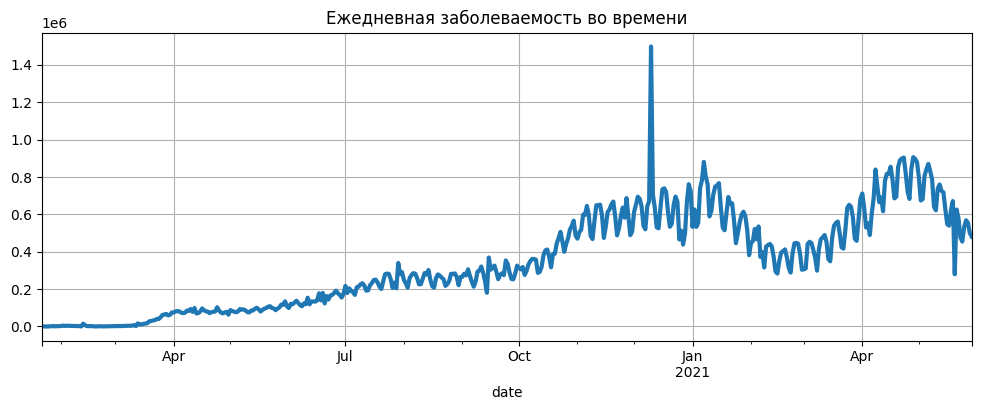

In [41]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
);

In [42]:
covid_df.to_csv('data/covid_df.csv')

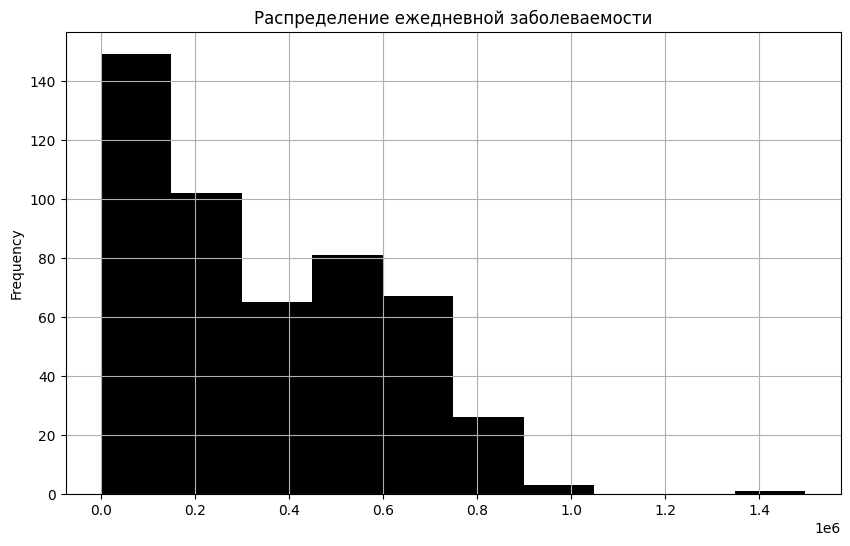

In [43]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
);

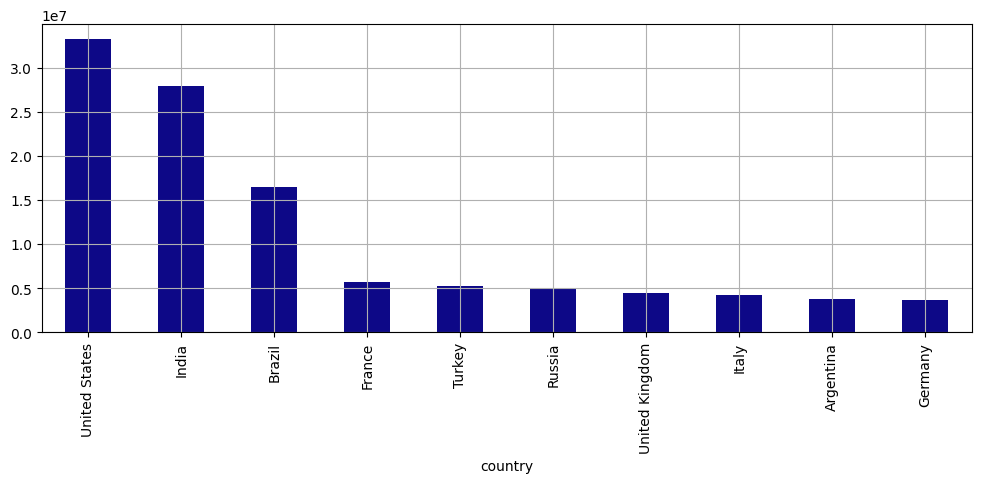

In [44]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

<AxesSubplot: xlabel='country'>

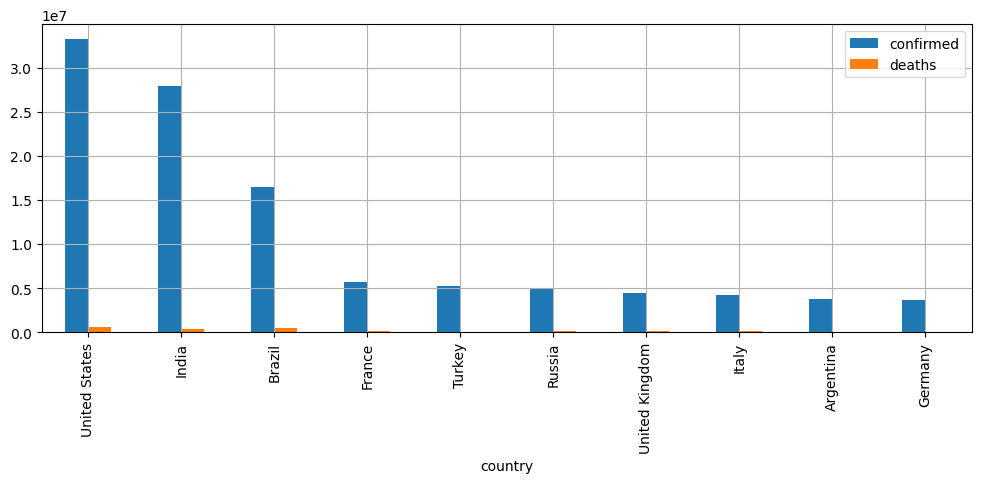

In [45]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
)


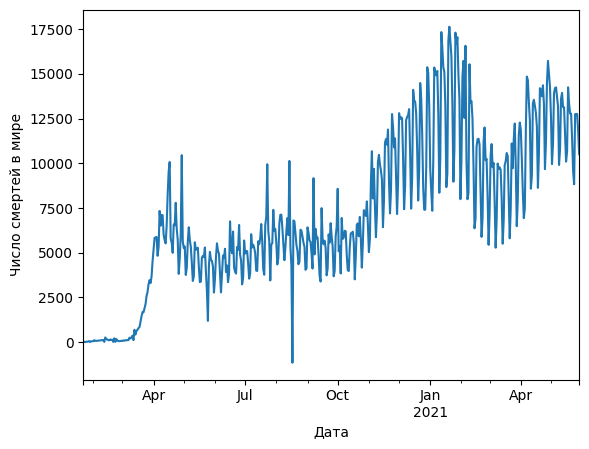

In [46]:
grouped_cases = covid_df.groupby('date')['daily_deaths'].sum()
grouped_cases.plot(kind='line',xlabel='Дата', ylabel='Число смертей в мире');

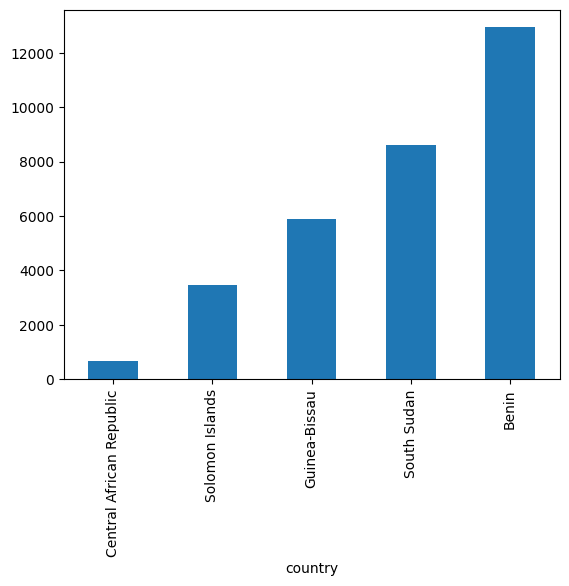

In [47]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

## matplotlib

In [48]:
import matplotlib.pyplot as plt

# Примечание. Если вы используете тёмную тему в VS Code, то для корректного отображения графиков на тёмном фоне выполните следующую команду по установке стиля отображения:
plt.style.use('default')

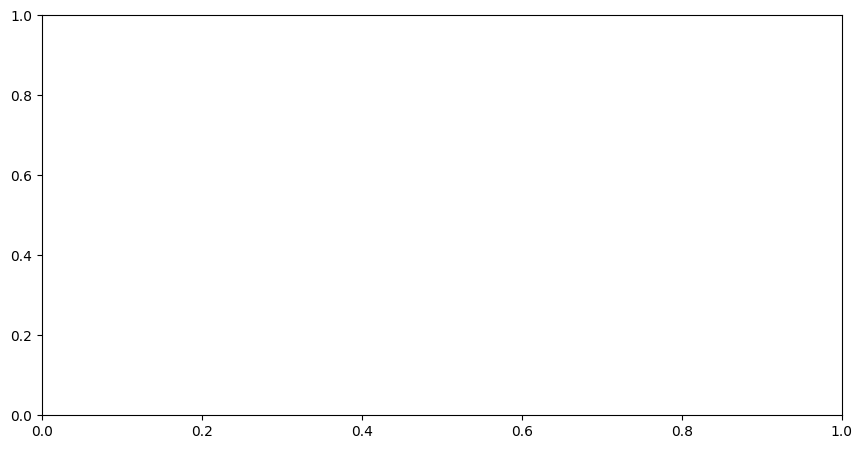

In [49]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

C:\Users\trigubov\AppData\Local\Temp\ipykernel_4068\831659259.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


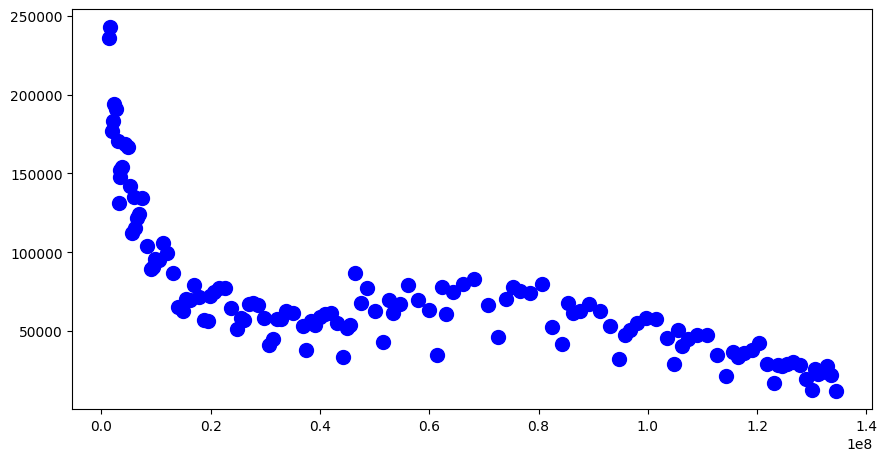

In [54]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue'
)
fig.show()

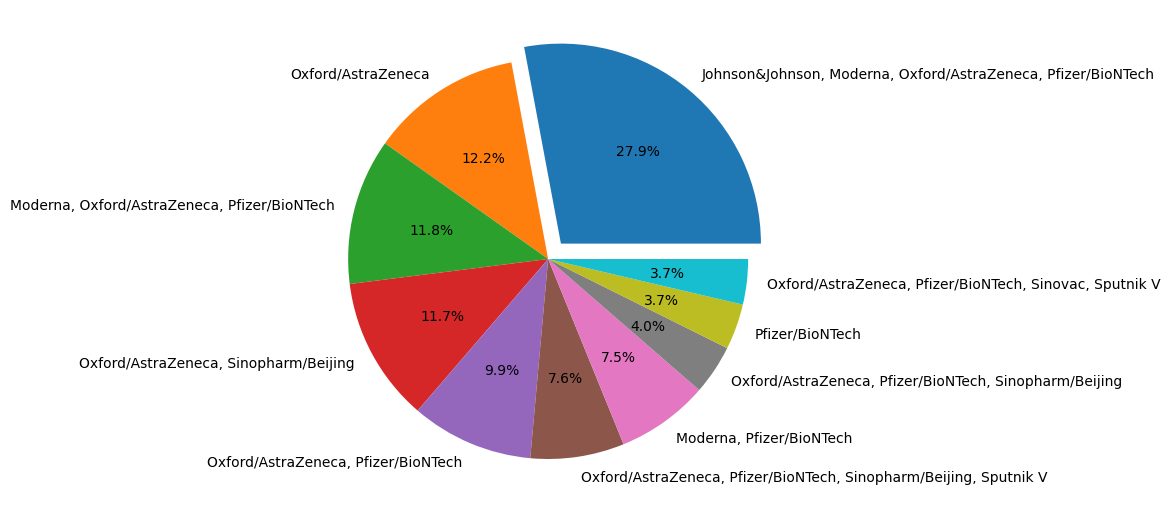

In [63]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

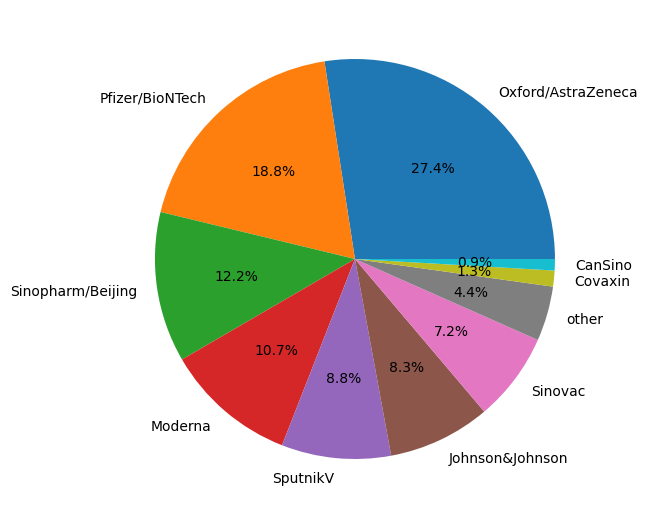

In [67]:
#избавляемся от пропусков в столбце с вакцинами
combination_not_nan = covid_df.dropna(subset=['vaccines'])
#группируем по странам и выбираем последнюю комбинацию вакцин в стране
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last() 
#заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) 
#создаём пустой словарь, ключами которого будут вакцины, а значениями — количество стран
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество
#преобразуем словарь в Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
#выделяем ТОП-7 вакцин и добавляем категорию 'other'
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:10]
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);

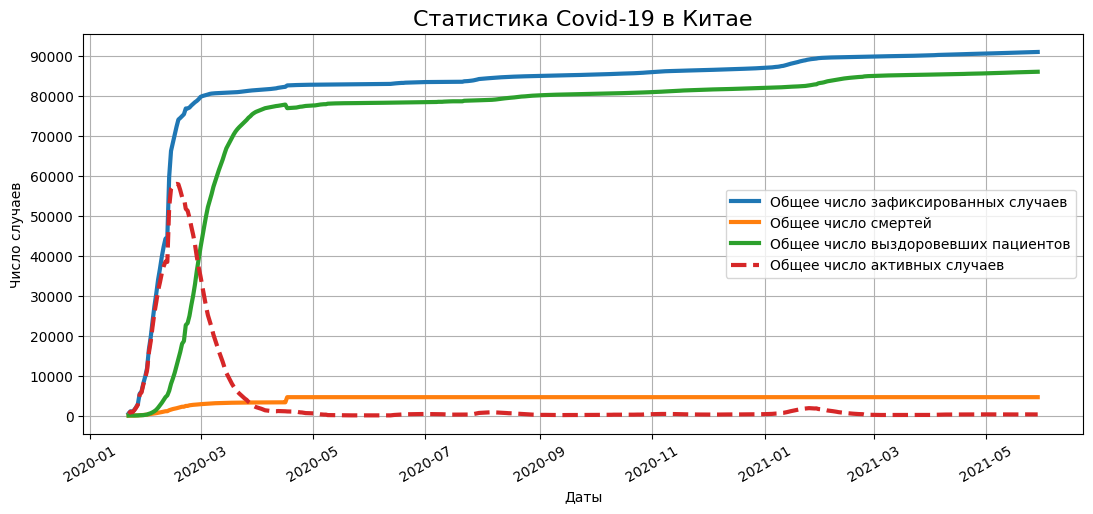

In [74]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

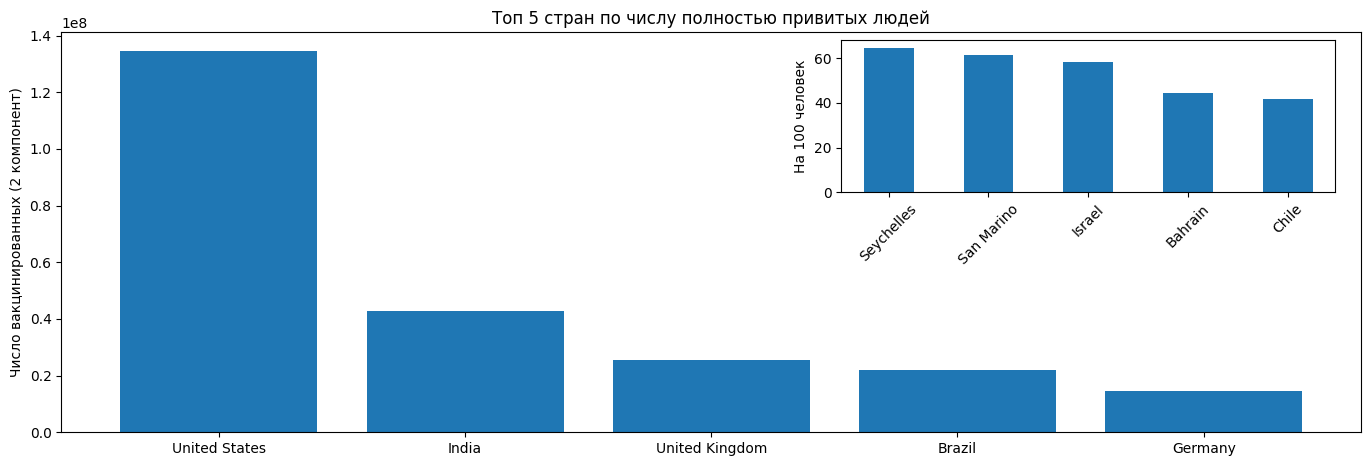

In [69]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

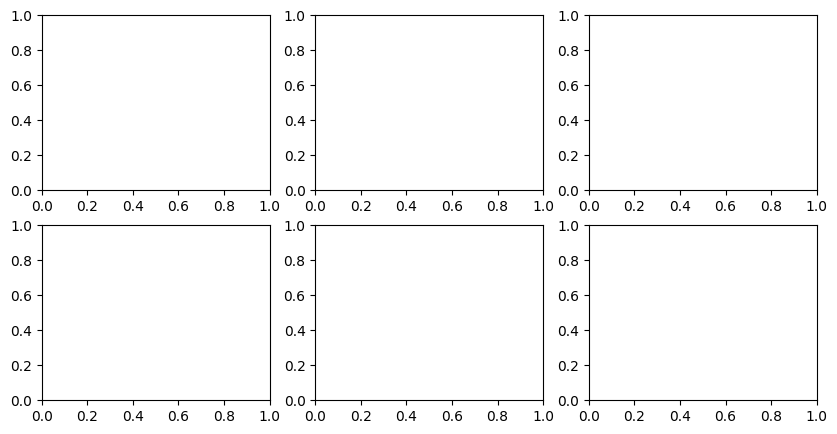

In [70]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

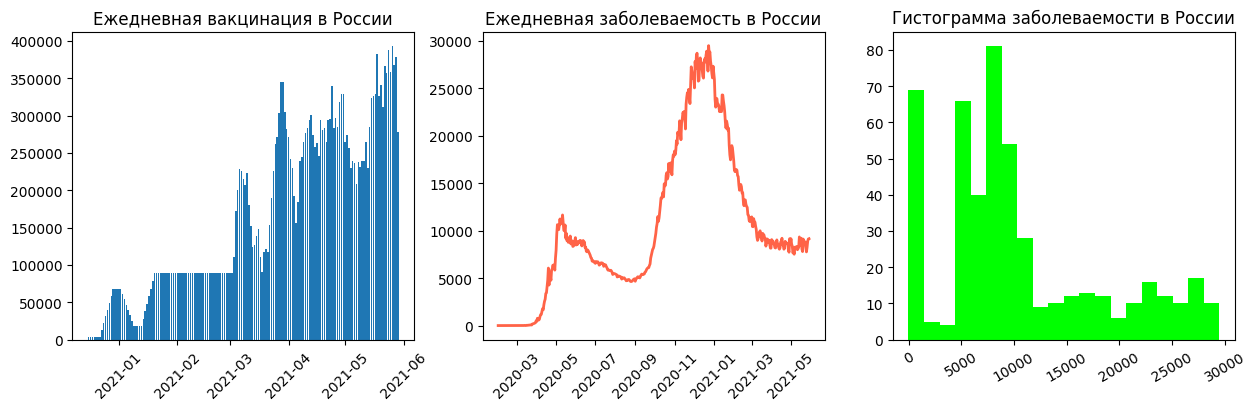

In [71]:
russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

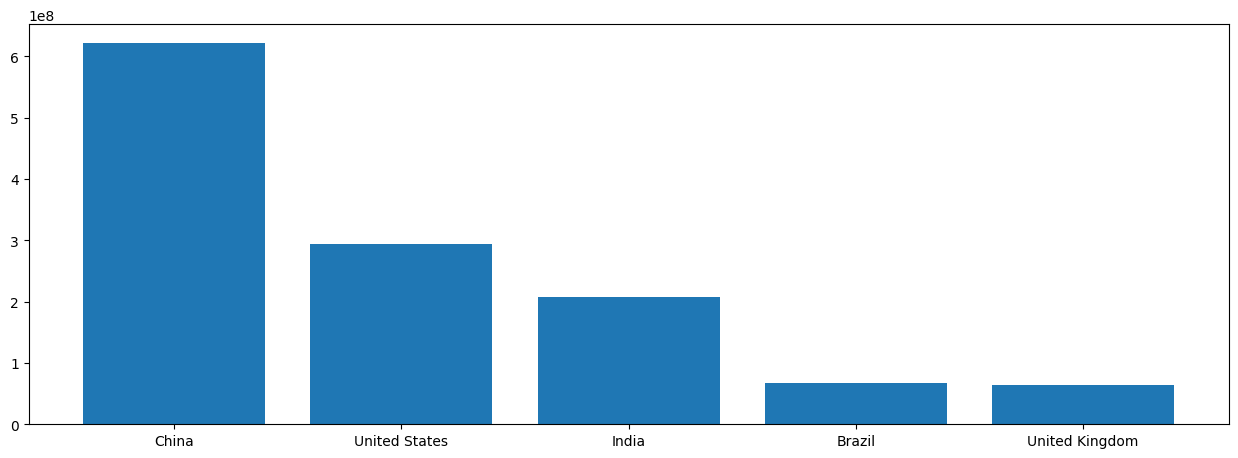

In [76]:
v = covid_df.groupby(['country'])['total_vaccinations'].last().nlargest(5)
fig = plt.figure(figsize=(12, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x=v.index,height=v);